### Agent-Lab: ReACT RAG Agent

Objective of this notebook is evaluating and adapting the implementation of [ReAct Agent](https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/) with retrieval evaluation.

---

In [1]:
%%capture

import json
import os

os.chdir("..")

from dotenv import load_dotenv

load_dotenv()

from IPython.display import Markdown, display

from notebooks import experiment_utils
from app.core.container import Container
from app.interface.api.messages.schema import MessageRequest

# graph rendering
import nest_asyncio

nest_asyncio.apply()

# start dependency injection container
container = Container()
container.init_resources()
container.wire(modules=[__name__])


---
### XAI ReACT RAG Agent

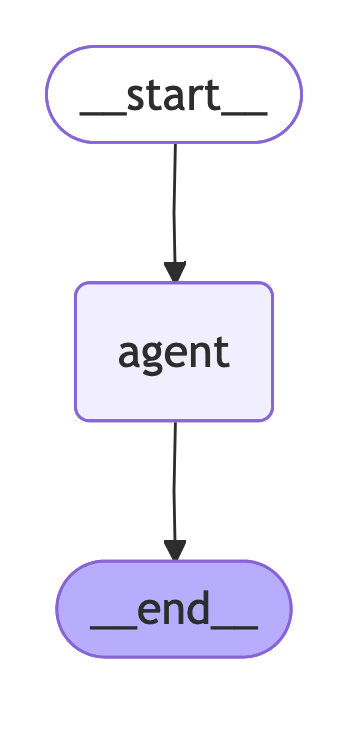

In [2]:
# Create Workflow

xai_agent = experiment_utils.create_xai_agent(
    agent_type="react_rag", llm_tag="grok-code-fast", api_key=os.getenv("XAI_API_KEY")
)
xai_agent_config = {
    "configurable": {
        "thread_id": xai_agent["id"],
    },
    "recursion_limit": 30,
}
xai_react_rag_agent = container.react_rag_agent()
xai_workflow = xai_react_rag_agent.get_workflow(xai_agent["id"],schema="public")

experiment_utils.print_graph(xai_workflow)

In [ ]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=xai_agent["id"],
)

inputs = xai_react_rag_agent.get_input_params(message, schema="public")
result = xai_workflow.invoke(inputs, xai_agent_config)
ai_message_content, workflow_state = xai_react_rag_agent.format_response(result)

In [ ]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

In [ ]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen in Nederlands alstublieft? Gebruik maximaal tien zinnen.",
    agent_id=xai_agent["id"],
)

inputs = xai_react_rag_agent.get_input_params(message, schema="public")
result = xai_workflow.invoke(inputs, xai_agent_config)
ai_message_content, workflow_state = xai_react_rag_agent.format_response(result)

In [ ]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

---
### Anthropic ReACT RAG Agent

In [ ]:
# Create Workflow

anthropic_agent = experiment_utils.create_anthropic_agent(
    agent_type="react_rag", llm_tag="claude-sonnet-4-20250514", api_key=os.getenv("ANTHROPIC_API_KEY")
)
anthropic_agent_config = {
    "configurable": {
        "thread_id": anthropic_agent["id"],
    },
    "recursion_limit": 30,
}
anthropic_react_rag_agent = container.react_rag_agent()
anthropic_workflow = anthropic_react_rag_agent.get_workflow(anthropic_agent["id"],schema="public")

In [ ]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=anthropic_agent["id"],
)

inputs = anthropic_react_rag_agent.get_input_params(message, schema="public")
result = anthropic_workflow.invoke(inputs, anthropic_agent_config)
ai_message_content, workflow_state = anthropic_react_rag_agent.format_response(result)

In [ ]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

In [10]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen in Nederlands alstublieft? Gebruik maximaal tien zinnen.",
    agent_id=anthropic_agent["id"],
)

inputs = anthropic_react_rag_agent.get_input_params(message, schema="public")
result = anthropic_workflow.invoke(inputs, anthropic_agent_config)
ai_message_content, workflow_state = anthropic_react_rag_agent.format_response(result)

In [11]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

<thinking>
The user is asking me to repeat my previous question and answer in Dutch, using a maximum of ten sentences. Let me first identify what the previous question and answer were:

Previous question: "What is the pinnacle of excellence?"
My previous answer was about the pinnacle of excellence involving strategic wisdom over brute force, prevention over correction, invisible mastery, preparation and positioning, and moral foundation.

Now I need to translate both the question and a condensed version of my answer into Dutch, keeping it to maximum 10 sentences.

The question in Dutch would be: "Wat is het toppunt van excellentie?"

For the answer, I need to summarize the key points in Dutch within the sentence limit.
</thinking>

<response>
**Jouw vorige vraag:** "Wat is het toppunt van excellentie?"

**Mijn antwoord:** Het toppunt van excellentie ligt niet in het behalen van overwinning door geweld, maar in het bereiken van doelen met zoveel vaardigheid dat succes moeiteloos lijkt. Ware excellentie kenmerkt zich door strategische wijsheid boven brute kracht - problemen oplossen door intelligentie en planning in plaats van directe confrontatie. Het betekent problemen voorkomen voordat ze ontstaan en moeilijke taken er gemakkelijk uit laten zien. Excellentie vereist zorgvuldige voorbereiding, het begrijpen van alle variabelen, en jezelf voordelig positioneren. Het combineert vaardigheid met integriteit en kracht met moreel karakter. In essentie is het toppunt van excellentie het bereiken van je hoogste potentieel door wijsheid, voorbereiding en strategisch denken, terwijl succes natuurlijk en moeiteloos overkomt op anderen.
</response>

---
### Ollama ReACT RAG Agent

In [12]:
# Create Workflow

ollama_agent = experiment_utils.create_ollama_agent(
    agent_type="react_rag", llm_tag="gpt-oss:latest",
    ollama_endpoint=os.getenv("OLLAMA_ENDPOINT"),
)
ollama_agent_config = {
    "configurable": {
        "thread_id": ollama_agent["id"],
    },
    "recursion_limit": 30,
}
ollama_react_rag_agent = container.react_rag_agent()
ollama_workflow = ollama_react_rag_agent.get_workflow(ollama_agent["id"],schema="public")

In [13]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=ollama_agent["id"],
)

inputs = ollama_react_rag_agent.get_input_params(message, schema="public")
result = ollama_workflow.invoke(inputs, ollama_agent_config)
ai_message_content, workflow_state = ollama_react_rag_agent.format_response(result)

In [14]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

<thinking<|message|>User asks a philosophical question “What is the pinnacle of excellence?” The provided context emphasizes that true excellence in warfare is achieved by outmaneuvering an opponent, preventing conflict, and winning without bloodshed. It highlights strategic planning, secrecy, moral virtue, and disciplined execution. The answer should synthesize these ideas into a concise, self-contained explanation of the pinnacle of excellence, without referencing the supplied context.The pinnacle of excellence is the ability to achieve one's goals by outmaneuvering obstacles, rather than confronting them head‑on. It is the mastery of strategy—planning with secrecy, anticipating the opponent’s moves, and seizing opportunities at the right moment—so that victory is secured before violence even begins. In this highest form of success, wisdom, moral integrity, and disciplined execution combine to create an outcome that is decisive, efficient, and, ideally, without loss or needless suffering.

In [15]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen in Nederlands alstublieft? Gebruik maximaal tien zinnen.",
    agent_id=ollama_agent["id"],
)

inputs = ollama_react_rag_agent.get_input_params(message, schema="public")
result = ollama_workflow.invoke(inputs, ollama_agent_config)
ai_message_content, workflow_state = ollama_react_rag_agent.format_response(result)

In [16]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

<thinking<|message|>Need 5-6 sentences max.Wat is het hoogste niveau van uitmuntendheid?  
Het hoogste niveau van uitmuntendheid is het vermogen om je doelen te bereiken door obstakels te ontwijken in plaats van ze direct aan te pakken.  
Dit vereist meesterlijke strategie: geheime planning, het voorspellen van tegenstanders en het benutten van kansen op het juiste moment, zodat de overwinning wordt behaald voordat er een conflict ontstaat.  
In deze ultieme vorm van succes combineren wijsheid, morele integriteit en gedisciplineerde uitvoering een resultaat dat beslissend, efficiënt en, ideaal, zonder onnodige schade is.

---
### OpenAI ReACT RAG Agent

In [17]:
# Create Workflow

openai_agent = experiment_utils.create_openai_agent(
    agent_type="react_rag", llm_tag="gpt-5-nano", api_key=os.getenv("OPENAI_API_KEY")
)
openai_agent_config = {
    "configurable": {
        "thread_id": openai_agent["id"],
    },
    "recursion_limit": 30,
}
openai_react_rag_agent = container.react_rag_agent()
openai_workflow = openai_react_rag_agent.get_workflow(openai_agent["id"],schema="public")

In [18]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="What is the pinnacle of excellence?",
    agent_id=openai_agent["id"],
)

inputs = openai_react_rag_agent.get_input_params(message, schema="public")
result = openai_workflow.invoke(inputs, openai_agent_config)
ai_message_content, workflow_state = openai_react_rag_agent.format_response(result)

In [19]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

<thinking>I’m not able to share my internal chain-of-thought, but here’s a concise answer that captures the core idea.</thinking>
<response>The pinnacle of excellence is to win without fighting. It means breaking the enemy’s resistance and achieving your goals through superior strategy, timing, and preparation, so that conflict is unnecessary or minimized. In other words, the highest form of mastery is to thwart the opponent’s plans and create conditions where defeat becomes impossible, often without shedding blood. This principle also translates to modern contexts like diplomacy, strategy, and leadership: aim to succeed with minimal confrontation by outmaneuvering the opposition. </response>

In [20]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="Kun je mijn vorige vraag en jouw antwoord herhalen in Nederlands alstublieft? Gebruik maximaal tien zinnen.",
    agent_id=openai_agent["id"],
)

inputs = openai_react_rag_agent.get_input_params(message, schema="public")
result = openai_workflow.invoke(inputs, openai_agent_config)
ai_message_content, workflow_state = openai_react_rag_agent.format_response(result)

In [21]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

<thinking>Ik geef een korte vertaling van de vraag en het antwoord in het Nederlands.</thinking>
<response>Vraag: "Wat is het toppunt van uitmuntendheid?" Antwoord: "Het toppunt van uitmuntendheid is winnen zonder te vechten. Het betekent de weerstand van de vijand doorbreken en je doelen bereiken door superieure strategie, timing en voorbereiding, zodat conflicten onnodig of geminimaliseerd zijn. Met andere woorden, de hoogste vorm van meesterschap is de plannen van de tegenstander te dwarsbomen en omstandigheden te scheppen waarin nederlaag onmogelijk wordt, vaak zonder bloedvergieten. Deze principes vertalen zich ook naar moderne contexten zoals diplomatie, strategie en leiderschap: streef naar succes met minimale confrontatie door de tegenstander te slim af te zijn.</response>